# Boston house dataset: price prediction using linear models

Linear regressions are simple, fast and can be powerful predictive models that allow to model not only linear but also non-linear relationships between the target and the predictors by extending or transforming the inputs to the model. Linear regressions also allow to have a complete visibility and understanding of the model, they act as a white box providing all the parameters used in the predictions. Using linear regressions we can also infer which variables are a significant addition to our models and what is the contribution of each variable. There are many in which linear regressions are preferred over more complex models like when a complete understanding of what the model is doing, or when a simpler model is needed: "simpler is better than complex".

In this notebook various linear predictive models are trained for the Boston dataset of house prices.
The techniques used are:
  - Simple linear regression
  - Multiple linear regression
  - Feature selection using stepwise regression
  - Various regression diagnostic plots are used in the notebook to assess the models:
        - Regression plots
        - Looking for outliers using influence plots
        - Partial regression plots
        
This notebook uses custom made plotting libraries that can be found here: [PairPlot](PairPlot.py) and a custom made library for [Forward selction](ForwardSelector.py)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-libraries-and-data" data-toc-modified-id="Load-libraries-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load libraries and data</a></span></li><li><span><a href="#Initial-data-exploration" data-toc-modified-id="Initial-data-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial data exploration</a></span><ul class="toc-item"><li><span><a href="#Target-variable:-y-pipeline-definition" data-toc-modified-id="Target-variable:-y-pipeline-definition-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Target variable: y pipeline definition</a></span></li></ul></li><li><span><a href="#Simple-linear-regression" data-toc-modified-id="Simple-linear-regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Simple linear regression</a></span><ul class="toc-item"><li><span><a href="#Making-predictions" data-toc-modified-id="Making-predictions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Making predictions</a></span></li><li><span><a href="#Adding-polinomial-terms-to-the-regression" data-toc-modified-id="Adding-polinomial-terms-to-the-regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Adding polinomial terms to the regression</a></span></li></ul></li><li><span><a href="#Multiple-linear-regression" data-toc-modified-id="Multiple-linear-regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multiple linear regression</a></span><ul class="toc-item"><li><span><a href="#Algorithmic-feature-selection-using-forward-stepwise-regression" data-toc-modified-id="Algorithmic-feature-selection-using-forward-stepwise-regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Algorithmic feature selection using forward stepwise regression</a></span></li></ul></li></ul></div>

## Load libraries and data

In [1]:
import pandas as pd
import numpy as np
# Libraries used for linear regression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import norm
# custom made class used for feature selection, view attached file
from ForwardSelector import ForwardSelector
# Libraries used for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# custom made plots, view attached file
from PairPlot import pair_plot, hist_plots, corr_plot, reg_plots, distplot_stats   
from DiagnosticPlots import diagnostic_plots
# Library used to load data
from sklearn.datasets import load_boston
# Preprocessing data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, cross_validate
# Some notebok settings for better image quality and notebook image embedding 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style('dark')

In [2]:
dataset = load_boston()
print(dataset['DESCR'])
print(dataset.keys())

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
target = 'PRICE'
# Create dataframe
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data[target] = dataset.target
print('Shape: ', data.shape)
data.head()

Shape:  (506, 14)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [4]:
print("Missing values:")
print(data.isnull().sum())

Missing values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


## Initial data exploration

Let's start by exploring the distribution of the target variable (PRICE):

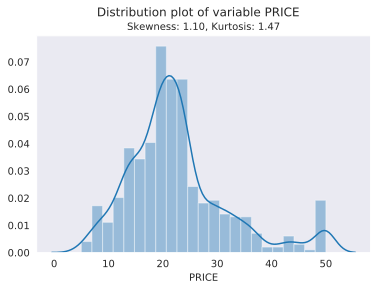

In [5]:
distplot_stats(data[target], title=f'Distribution plot of variable {target}')

There are some observations censored at 50. The distribution presents some right Skewness and high Kurtosis. 

### Target variable: y pipeline definition

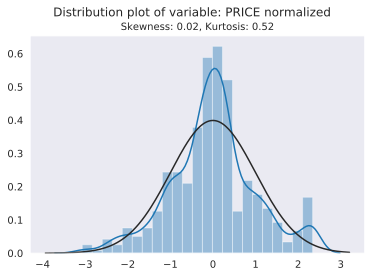

In [6]:
# Create pipeline:
y_pipe = Pipeline(steps=[
    ('transform', PowerTransformer(method='box-cox', standardize=True))
])
y = y_pipe.fit_transform(data[[target]])  # y is be a numpy array

# Plot transformed data
distplot_stats(y.ravel(), fit=norm, title=f'Distribution plot of variable: {target} normalized')

The data is now closer to a normal distribution: Skewness and Kurtosis were reduced.
Let's continue by exploring the distribution of the other variables in the dataset:

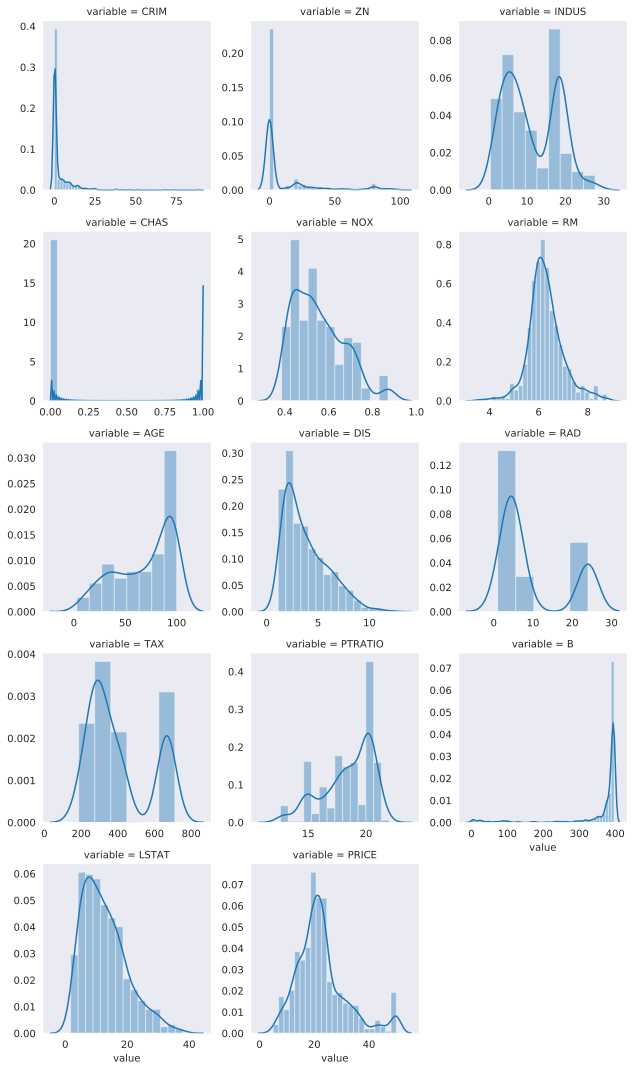

In [7]:
hist_plots(data)

Lets observe also the correlation matrix of the data:

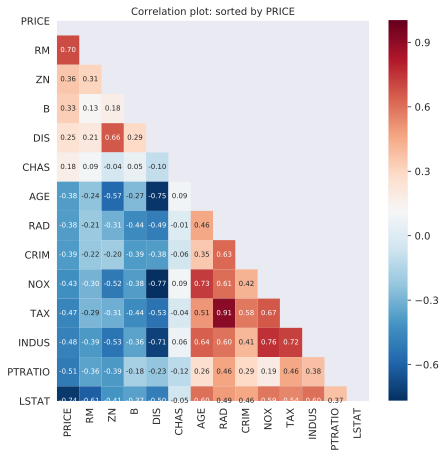

In [8]:
corr_plot(data, target=target)

The highest absolute correlation value is for variable LSTAT (-0.74), followed by variable RM (0.70) and PTRATIO (-0.51). These variables should be included first in the linear regressions to be tested.
There is a high correlation among the following variables:
  - TAX and RAD: 0.91
  - DIS seems to have high correlation with AGE, NOX and INDUS, these variables might present multicolinearity

Now lets observe the distribution plots of each variable vs. the target:

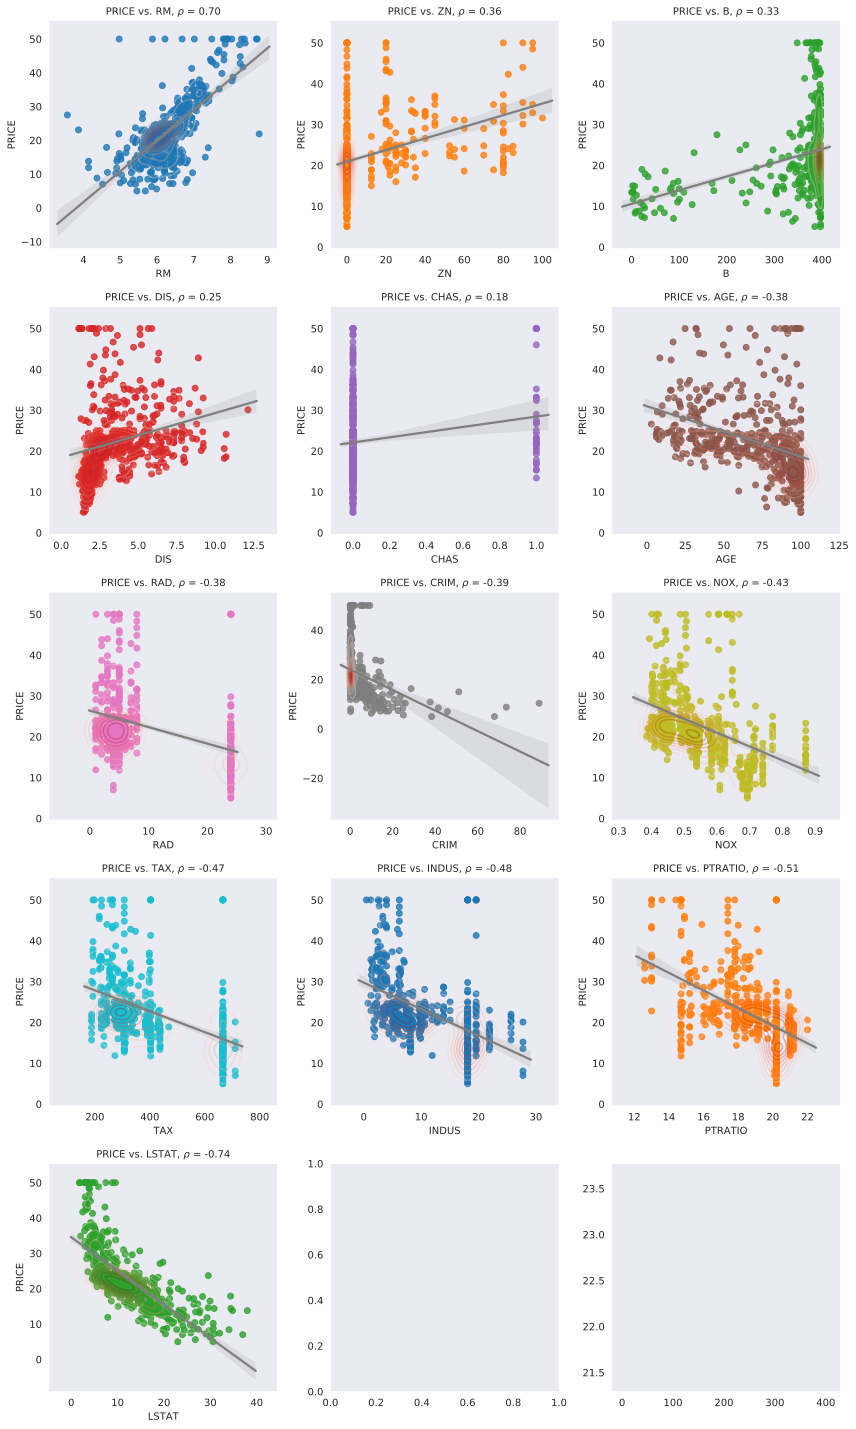

In [9]:
reg_plots(data, target)

## Simple linear regression

Let's start with the variable that presents the higher absolute correlation: LSTAT

In [10]:
formula = f'{target} ~ LSTAT'
lm_simple = smf.ols(formula=formula, data=data).fit()   # ols: Ordinary Least Squares linear reg.
print(lm_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           5.08e-88
Time:                        16:02:58   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

The low p-value of the F-statistic indicates the model is performing better than random, that means LSTAT is related with the response and can be used to predict the price of the houses, but only 54.3% of the variance in the data is explained by such a model ($R^2$), so further information can be added by using more features.

Let's inspect the residuals of the regression:

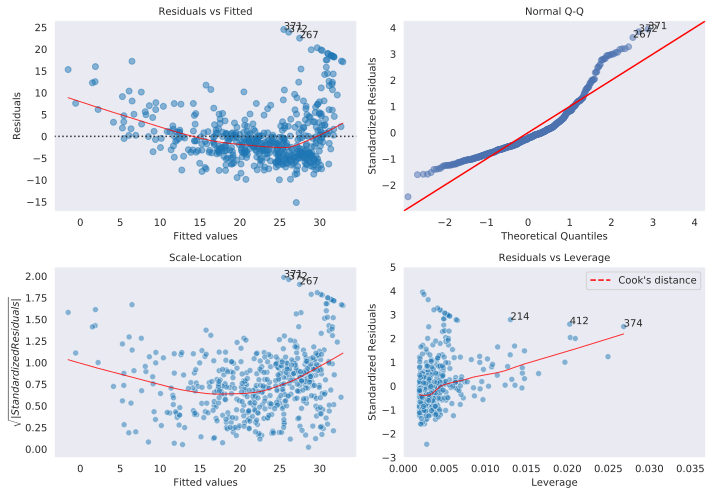

In [11]:
diagnostic_plots(lm_simple, figsize=(10, 7))

These 4 diagnostic plots examine a few different assumptions about the model and the data:
  1. The data can be fit by a line (this includes any transformations made to the predictors, e.g., x^2 or √(x)
  2. Errors are normally distributed with mean zero
  3. Errors have constant variance, i.e., [homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity)
  4. There are no high [leverage points](https://newonlinecourses.science.psu.edu/stat501/node/337/)

The *residuals vs. fitted plot* indicates that there is a non-linearity not captured by the feature LSTAT. An ideal residual vs. fitted plot will look like random noise, but here there is a clear non-linear pattern in the residuals, perhaps the variance in the data might be better captured using a polinomial transformation of one or more features.

The non-linear behaviour is more evident in the normal *Q-Q plot*. A normal Q-Q plot of a normally distributed residuals has all of the data points lying on or close to the red line.

The *Scale-Location plot* is used to identify if there is heteroscedasticity in the data (if the variance of the residuals changes along the fitted values), in this case, the Scale-Location plot presents a 'V' shape.

The *Residuals vs. Leverage plot* is useful to identify the data points with high leverage: the model's parameters are highly sensitive to these high leverage data points, and should be further analyzed (or removed). In this case, there are not high leverage data points.

### Making predictions

When making predictions, the method `get_prediction()` from the lm object will return the mean, standard errors and confidence intervals of the prediction, this can help us assessing how accurate are the predictions made from the model:

In [12]:
new_data = pd.DataFrame({'LSTAT': (5, 10, 15)})
p = lm_simple.get_prediction(new_data)
p.summary_frame()

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  29.803594  0.405247      29.007412      30.599776     17.565675   
1  25.053347  0.294814      24.474132      25.632563     12.827626   
2  20.303101  0.290893      19.731588      20.874613      8.077742   

   obs_ci_upper  
0     42.041513  
1     37.279068  
2     32.528459

The confidence intervals of the coefficients can be also found using the `conf_int()` method:

In [13]:
lm_simple.conf_int()

0          1
Intercept  33.448457  35.659225
LSTAT      -1.026148  -0.873951

### Adding polinomial terms to the regression

Lets add the squared of `LSTAT` to the regression to see if it improves the model or not:

In [14]:
formula = f'{target} ~ LSTAT + np.power(LSTAT, 2)'
lm_lstat_2 = smf.ols(formula=formula, data=data).fit()
print(lm_lstat_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 22 Jul 2019   Prob (F-statistic):          1.56e-112
Time:                        16:03:00   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0

Since the $LSTAT^2$ was added to the regression, the results indicate there might be multicollinearity. This is expected and we can ommit this message, or use orthogonal polynomials.

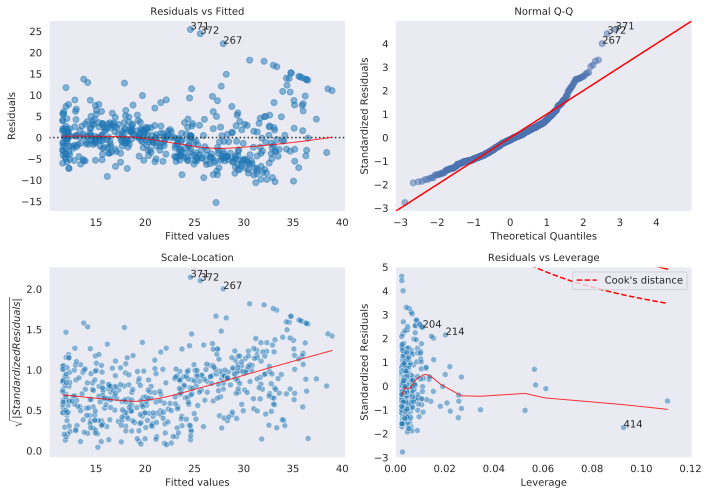

In [15]:
diagnostic_plots(lm_lstat_2, figsize=(10, 7))

It can be seen how the distribution of the residuals improved by only adding one squared term of LSTAT, the distribution is now "more normally distributed", also the heteroscedasticity has been reduced. But is the addition of this new term actually improving the model? is the error decreasing? To be able to measure and test this the ANOVA method can be used.

The Analysis of Variance (ANOVA) is a methodology commonly used to evaluate the difference among two (or more) groups in a sample. When used in regression, the analysis is based on the partial F-test statistic, which is an incremental F-test that is used to determine the statistical significance of a group of variables. 

The partial F-test is used in model building and variable selection to help decide if a variable to be added to a model makes it significantly better or not. Let's use it to compare the `lm_simple` model agains the `lm_lstat_2`:

In [16]:
sm.stats.anova_lm(lm_simple, lm_lstat_2)

# The ANOVA test can also be calculated like this (but only for two models):
# lm_lstat_2.compare_f_test(lm_simple)

df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28

The p-value `Pr(>F)` of the F-test is lower than 5%, which indicates that there is evidence that the model using `LSTAT` squared is significant better than the simple model `lm_simple`. The larger the falue of the F-Test statistic, the larger the change in error reduction. In this case the residual sum of squares is being reduced from 19472 to 15347.

This means that the model can be improved by adding more features to it. But which features should be included? Let's continue introducing more variables to the regression model.

## Multiple linear regression

The initial intuition should be to continue adding variables that are correlated with the target. But what if we add all the available features we have?

In [17]:
cols = data.columns.difference([target])   # select all columns but target
formula = target + ' ~ ' + ' + '.join(cols)
lm_all = smf.ols(formula=formula, data=data).fit()
print(lm_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 22 Jul 2019   Prob (F-statistic):          6.72e-135
Time:                        16:03:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

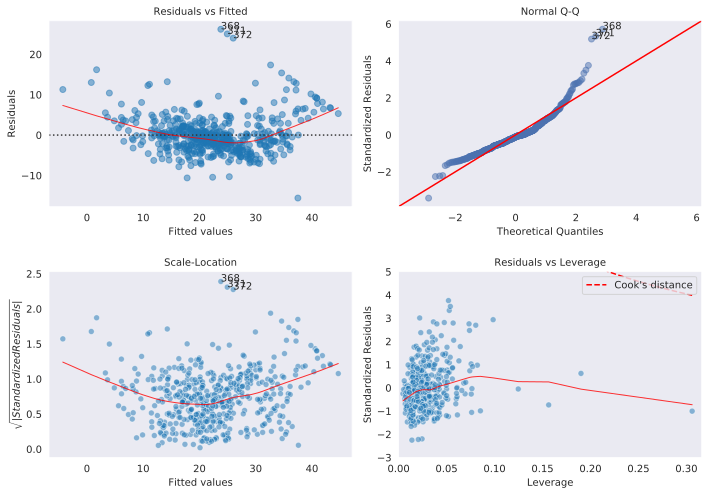

In [18]:
diagnostic_plots(lm_all, figsize=(10, 7))

There are indications of multicolinearity (when two or more predictors are highly correlated to one another). This was already found with the correlation plot when we found that:
  - TAX and RAD have a correlation of 0.91
  - DIS seems to have high correlation with AGE, NOX and INDUS, these variables might present multicolinearity.
  
From the summary of the regression we also see that the AGE and INDUS variables present a p-value higher than the 5%, which indicate they are might not significant in the regression (or that there is multicolinearity present in the model, or just one of them is significant).

In order to further measure the multicolinearity, the Variance Inflation Factor (VIF) can be used. The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone. It can be calculated as follows:

In [19]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(formula, data, return_type='dataframe'):
    # get y and X dataframes based on the formula previously defined:
    y, X = dmatrices(formula, data, return_type=return_type)
    # For each X, calculate VIF and save in dataframe
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif

vif = get_vif(formula, data)
vif

VIF Factor   features
0   585.265238  Intercept
1     3.100826        AGE
2     1.348521          B
3     1.073995       CHAS
4     1.792192       CRIM
5     3.955945        DIS
6     3.991596      INDUS
7     2.941491      LSTAT
8     4.393720        NOX
9     1.799084    PTRATIO
10    7.484496        RAD
11    1.933744         RM
12    9.008554        TAX
13    2.298758         ZN

As a rule of thumb, a VIF greater than 5 or 10 indicates a high collinearity. In this case, the variables TAX and RAD present the highest VIF. The most appropriated measure would be to remove one of them from the analysis, or to create a compound variable among TAX and RAD.

Up to this point we know we can add variables to improve the predictive power of the model, but there could be problems of multicolinearity and that adding a variable could lead to a new model that is not significantly better than before. We could also include variables that are transformations of the existing ones, like diverse polynomials of each predictor, that is using mathematical functions like log or sqrt over selected features.

In this case, we can implement an algorithmic procedure in order to add variables to the model **but only if they actually improve it**, and if the features used in the model are significantive. This is also known as the Forward Stepwise Feature Selection.

### Algorithmic feature selection using forward stepwise regression

I have created the class [ForwardSelector](ForwardSelect.py). It can be used to train a multiple regression model with the most important and significant features and/or combinations of those features. The resulting model is found by iteratively searching the variables that improve the most the model one at a time.

To initialize it, just pass the input data as a pandas DataFrame and the name of the target variable (the name of the column that should be also present in the input DataFrame). When calling the method `forward_select()`, the algorithm will search in an iterative way among all the available features which is the one that reduces the most the error. Once a feature is selected, the search will continue over the remaining features until no further improvement is found:

Updated model: PRICE ~ 1 + LSTAT
  BIC:  3295.43
  RMSE: 6.22
  R^2:  54.41%
Updated model: PRICE ~ 1 + LSTAT + RM
  BIC:  3184.22
  RMSE: 5.54
  R^2:  63.86%
Updated model: PRICE ~ 1 + LSTAT + RM + PTRATIO
  BIC:  3131.00
  RMSE: 5.23
  R^2:  67.86%
Updated model: PRICE ~ 1 + LSTAT + RM + PTRATIO + DIS
  BIC:  3118.49
  RMSE: 5.14
  R^2:  69.03%
Updated model: PRICE ~ 1 + LSTAT + RM + PTRATIO + DIS + NOX
  BIC:  3094.80
  RMSE: 4.99
  R^2:  70.81%
Updated model: PRICE ~ 1 + LSTAT + RM + PTRATIO + DIS + NOX + CHAS
  BIC:  3087.52
  RMSE: 4.93
  R^2:  71.58%
Updated model: PRICE ~ 1 + LSTAT + RM + PTRATIO + DIS + NOX + CHAS + B
  BIC:  3082.25
  RMSE: 4.88
  R^2:  72.22%
Updated model: PRICE ~ 1 + LSTAT + RM + PTRATIO + DIS + NOX + CHAS + B + ZN
  BIC:  3080.31
  RMSE: 4.85
  R^2:  72.66%
Updated model: PRICE ~ 1 + LSTAT + RM + PTRATIO + DIS + NOX + CHAS + B + ZN + CRIM
  BIC:  3082.42
  RMSE: 4.83
  R^2:  72.88%
Updated model: PRICE ~ 1 + LSTAT + RM + PTRATIO + DIS + NOX + CHAS + B + Z

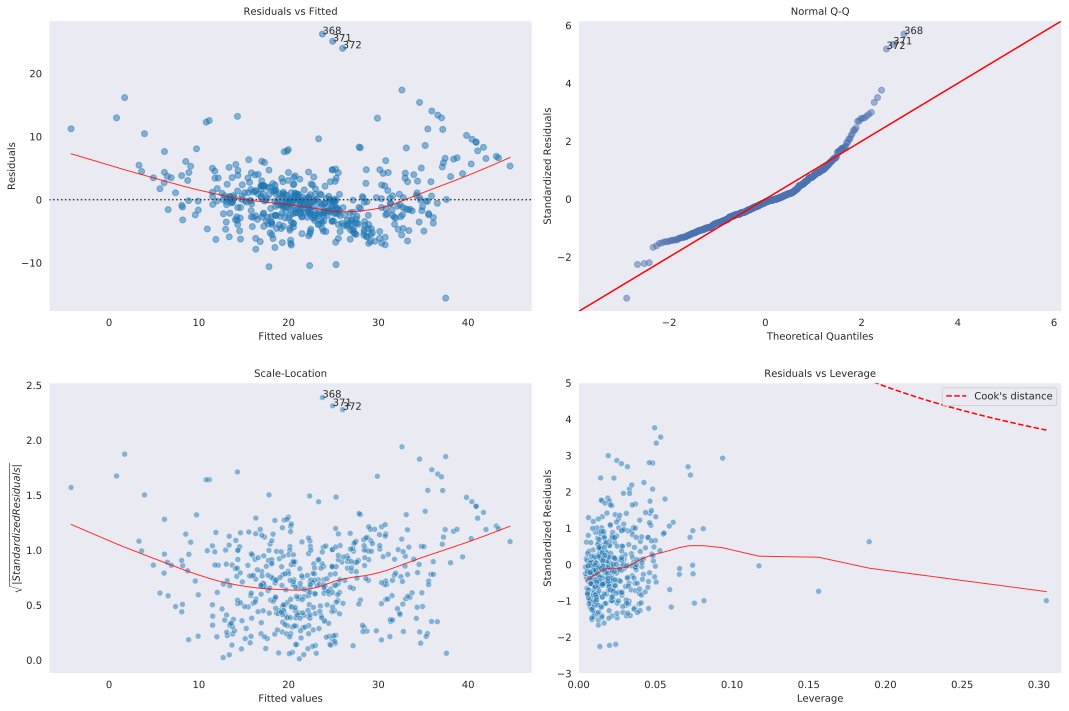

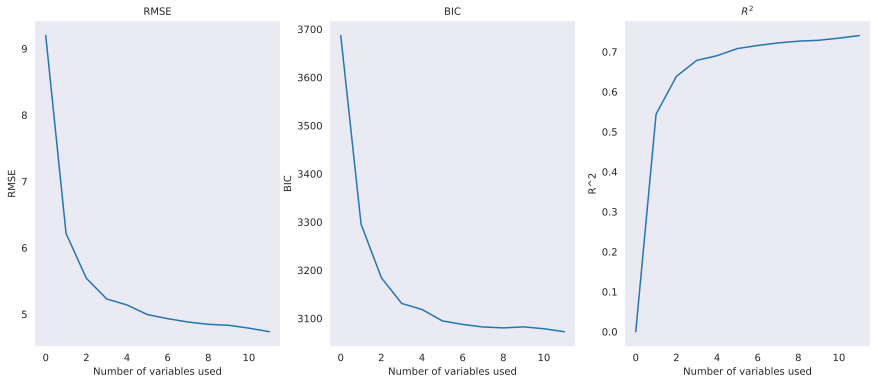

In [20]:
selector = ForwardSelector(data, target)
selector.forward_select()

The algorithm iteratively added one feature at a time until the *best* feature subset was found:
        PRICE ~ 1 + LSTAT + RM + PTRATIO + DIS + NOX + CHAS + B + ZN + CRIM + RAD + TAX

We can see that the found model is slightly better than the one that uses all the features as inputs: it has a better BIC criterion, better R-squared and uses fewer inputs.

However, there is evidence of non-linear behavior in the residuals and some heteroscedasticity. We could add non-linear terms in the regression to try to mitigate this, as we did with the simple linear regression.

The [ForwardSelector](ForwardSelector.py) class can add any number of polynomial degrees to any input variable. To specify to which variables apply a polynomial, just input a list of column names in `poly_features` when initializing the forward selector object and the grade of the polynomials using `poly_grade` like this:

Extending polinomials, list of features to test: 
['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN', 'np.power(LSTAT,2)', 'np.power(LSTAT,3)', 'np.power(LSTAT,4)', 'np.power(LSTAT,5)', 'np.power(PTRATIO,2)', 'np.power(PTRATIO,3)', 'np.power(PTRATIO,4)', 'np.power(PTRATIO,5)', 'np.power(RM,2)', 'np.power(RM,3)', 'np.power(RM,4)', 'np.power(RM,5)', 'np.power(DIS,2)', 'np.power(DIS,3)', 'np.power(DIS,4)', 'np.power(DIS,5)', 'np.power(INDUS,2)', 'np.power(INDUS,3)', 'np.power(INDUS,4)', 'np.power(INDUS,5)']
Updated model: PRICE ~ 1 + LSTAT
  BIC:  3295.43
  RMSE: 6.22
  R^2:  54.41%
Updated model: PRICE ~ 1 + LSTAT + np.power(RM,5)
  BIC:  3082.89
  RMSE: 5.01
  R^2:  70.42%
Updated model: PRICE ~ 1 + LSTAT + np.power(RM,5) + np.power(LSTAT,2)
  BIC:  3024.33
  RMSE: 4.71
  R^2:  73.97%
Updated model: PRICE ~ 1 + LSTAT + np.power(RM,5) + np.power(LSTAT,2) + PTRATIO
  BIC:  2991.46
  RMSE: 4.53
  R^2:  75.91%
Updated model: PRICE ~ 1 + LSTAT + 


Variance Inflation Factors (VIF): 
       VIF Factor            features
0   1.157010e+07           Intercept
1   2.937780e+01               LSTAT
2   8.481428e+06     np.power(RM, 5)
3   2.557781e+01  np.power(LSTAT, 2)
4   1.845553e+00             PTRATIO
5   5.876820e+03                 DIS
6   2.027245e+00                CRIM
7   4.629393e+00                 NOX
8   4.128028e+06                  RM
9   1.105446e+08     np.power(RM, 4)
10  2.056438e+08     np.power(RM, 3)
11  1.086662e+00                CHAS
12  7.373334e+00                 RAD
13  7.689374e+07     np.power(RM, 2)
14  1.035627e+05    np.power(DIS, 2)
15  7.829056e+00                 TAX
16  1.402981e+00                   B
17  3.224176e+05    np.power(DIS, 3)
18  2.301061e+05    np.power(DIS, 4)
19  2.513320e+04    np.power(DIS, 5)

ANOVA results:
    df_resid           ssr  df_diff       ss_diff            F Pr(>F)
0      505.0  42716.295415      0.0           NaN          NaN    nan
1      504.0  19472.381418    

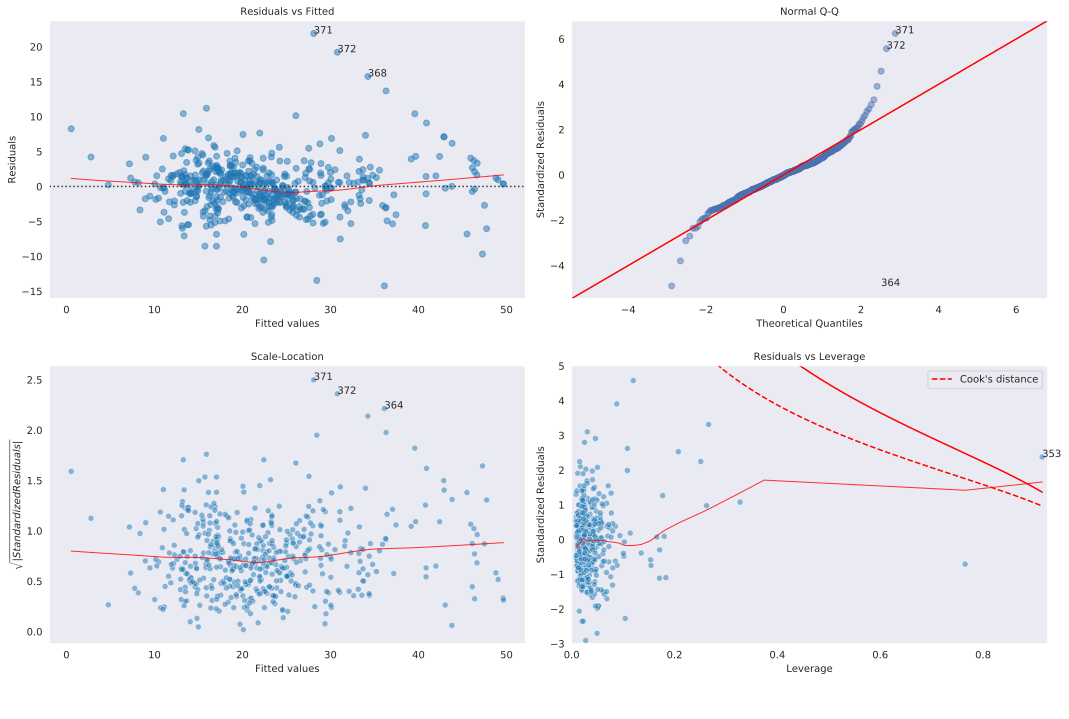

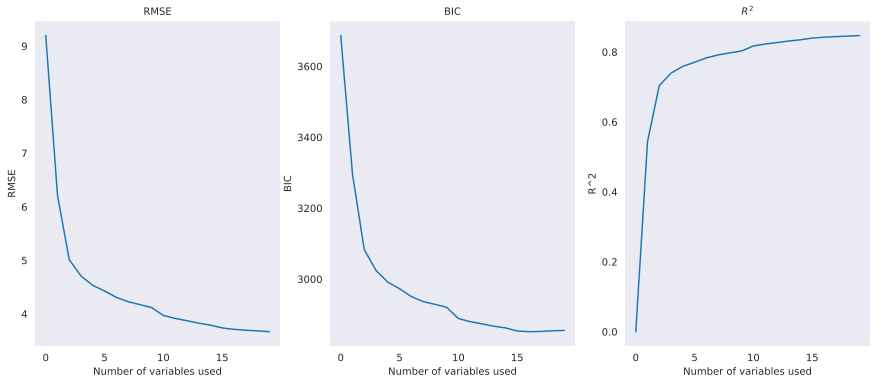

In [21]:
poly_features = ['LSTAT', 'PTRATIO', 'RM', 'DIS', 'INDUS']
poly_grade = 5
selector = ForwardSelector(data, target, poly_features=poly_features, poly_grade=poly_grade)
selector.forward_select()

The ANOVA test indicates how the model is improving with each addition of a new feature by the algorithm. All of the feature additions are significative and the residual standard error is reduced significatively by each step in the algorithm. The best model found has an explained variance of 84.4%.


Additionally interaction terms among variables and other forms of non-linear behaviour can be added to it to the regression and to the ForwardSelector object, by the use of the Patsy language and parsing them as a list using the `other_features` input:

In [22]:
poly_features = ['LSTAT', 'PTRATIO', 'RM', 'DIS', 'INDUS']
poly_grade = 5
other_features = ['LSTAT:RM', 'np.log(LSTAT)', 'np.sqrt(LSTAT)', 'np.log(RM)', 'np.log(DIS)']
selector = ForwardSelector(data, target, poly_features=poly_features, poly_grade=poly_grade, other_features=other_features)
selector.forward_select(verbose=0)
print(selector.final_model.summary())
print(selector.final_formula)

Extending polinomials, list of features to test: 
['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN', 'LSTAT:RM', 'np.log(LSTAT)', 'np.sqrt(LSTAT)', 'np.log(RM)', 'np.log(DIS)', 'np.power(LSTAT,2)', 'np.power(LSTAT,3)', 'np.power(LSTAT,4)', 'np.power(LSTAT,5)', 'np.power(PTRATIO,2)', 'np.power(PTRATIO,3)', 'np.power(PTRATIO,4)', 'np.power(PTRATIO,5)', 'np.power(RM,2)', 'np.power(RM,3)', 'np.power(RM,4)', 'np.power(RM,5)', 'np.power(DIS,2)', 'np.power(DIS,3)', 'np.power(DIS,4)', 'np.power(DIS,5)', 'np.power(INDUS,2)', 'np.power(INDUS,3)', 'np.power(INDUS,4)', 'np.power(INDUS,5)']
Feature np.log(DIS) was removed due to low p-value!
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     326.8


Using `log` functions in this case provided a simpler model but with a lower explained variance and higher residual error. Different combinations of imputs, polynomial degrees, and non-linear functions could be used with the ForwardSelector object until finding the best possible combinations of features to use.

The final decision of which model is the best should be done by using cross-validation and a final performance test should be done in a test dataset. For this example, the model with higer polynomial order presents a higher R-squared, but its more likely to overfit the input data.